In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

In [123]:
dataset = pd.read_csv("hearing_test.csv")
dataset

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [124]:
X=dataset[['age','physical_score']].values
y=dataset[['test_result']].values
Y=y.reshape(-1,1)

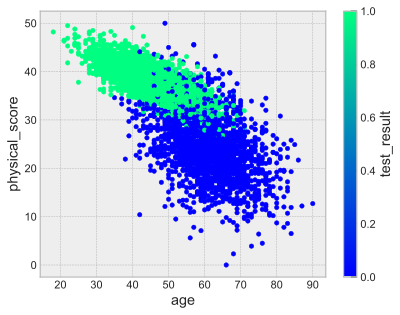

In [125]:
# Visualisation
dataset.plot.scatter(x='age',y='physical_score', c='test_result', colormap='winter')
plt.show()

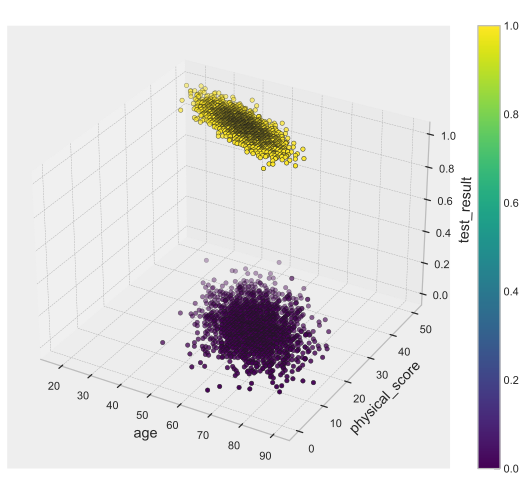

In [126]:

X_3d = np.column_stack((X, Y))

# Visualisation en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis', edgecolor='k')
ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')
plt.title(' ')
plt.colorbar(scatter)
plt.show()


In [127]:
# Split en train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 2)
(1000, 2)
(4000, 1)
(1000, 1)


### normalisation 

In [128]:
def z_score_normalization(data):
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [129]:
x_train_norm, mean,std=z_score_normalization(X_train)
x_train_norm

array([[-1.11395502,  0.92570676],
       [ 0.55874926,  0.00981228],
       [-0.05751021, -0.60078404],
       ...,
       [ 1.7912682 , -1.74870512],
       [-1.20199209,  0.75473979],
       [ 0.38267512,  0.37617007]], shape=(4000, 2))

In [130]:
x_train_norm.mean()

np.float64(-8.950618024528011e-16)

In [131]:
x_train_norm.std()

np.float64(0.9999999999999996)

In [132]:
# Normalization de x_test
x_test_norm= (X_test - mean)/std
x_test_norm

array([[ 0.29463805,  0.8524352 ],
       [ 0.64678632, -1.02820146],
       [-0.84984382,  0.59598475],
       ...,
       [ 0.03052685,  0.388382  ],
       [ 0.64678632,  0.51050126],
       [-0.67376968,  0.30289852]], shape=(1000, 2))

In [133]:
print(x_train_norm[:10])
print(x_train_norm.shape)

[[-1.11395502  0.92570676]
 [ 0.55874926  0.00981228]
 [-0.05751021 -0.60078404]
 [ 0.11856392  0.55934897]
 [-0.76180675  0.71810401]
 [-0.32162142  0.25405081]
 [-0.58573262  0.41280585]
 [ 0.03052685  0.59598475]
 [-0.84984382  0.82801135]
 [-0.84984382  0.87685906]]
(4000, 2)


### modele

In [134]:
# La fonction sigmoide
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

In [135]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [136]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [137]:
#Fonction Coût
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [138]:
#Optimisation - Gradient et Descente de Gradien
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [139]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [140]:
#Prédiction
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

In [141]:
#Modèle final
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b
    

In [142]:
W,b=regression_logistique(x_train_norm, Y_train)

In [143]:

y_pred = predict(X_test, W, b)
print("Accuracy=",np.round(accuracy_score(Y_test, y_pred)*100),'%')

Accuracy= 66.0 %


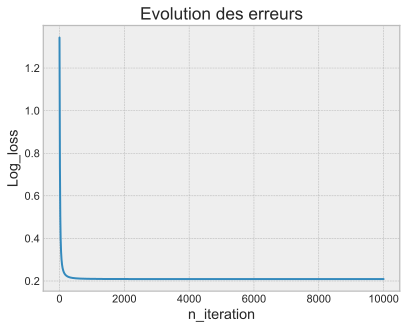

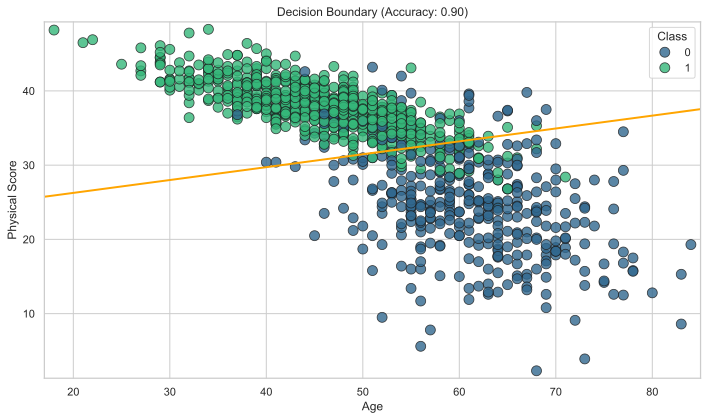

In [144]:
# ---  ---

# 1. Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 2. Plot TEST data (raw scale)
sns.scatterplot(
    x=X_test[:, 0], 
    y=X_test[:, 1], 
    hue=Y_test.flatten(),
    palette='viridis',
    alpha=0.8,
    s=100,
    edgecolor='k'
)

# 3. Create meshgrid (raw scale)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300), 
                       np.linspace(x2_min, x2_max, 300))

# 4. Normalize meshgrid points using TRAINING mean/std
mesh_points = np.c_[xx1.ravel(), xx2.ravel()]
mesh_norm = (mesh_points - mean) / std  # Your normalization function's params

# 5. Compute decision function (W·X + b)
Z = mesh_norm @ W + b  # Matrix multiplication
Z = Z.reshape(xx1.shape)  # Reshape for contour

# 6. Plot boundary (level=0 is where sigmoid(W·X + b) = 0.5)
plt.contour(xx1, xx2, Z, levels=[0], colors='orange', linewidths=2, linestyles='solid')

# 7. Add labels and title
plt.title(f"Decision Boundary (Accuracy: {accuracy_score(Y_test, predict(x_test_norm, W, b)):.2f})")
plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.legend(title='Class')

plt.tight_layout()
plt.show()

### qusetion 2 : modele non lineare

In [145]:
def mapFeature(X1, X2, degree):
    #res = np.ones(X1.shape[0])
    res = np.zeros((X1.shape[0], 0))
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res


In [146]:
degree=2
Poly_X_train=mapFeature(x_train_norm[:, 0],x_train_norm[:, 1],degree)
Poly_X_test=mapFeature(x_test_norm[:, 0],x_test_norm[:, 1],degree)

print(Poly_X_train.shape)
print(Poly_X_test.shape)

(4000, 5)
(1000, 5)


In [147]:
W,b=regression_logistique(Poly_X_train, Y_train)

In [148]:
y_pred = predict(Poly_X_test, W, b)
print("Accuracy=",np.round(accuracy_score(Y_test, y_pred)*100),'%')

Accuracy= 91.0 %


In [149]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[330  54]
 [ 34 582]]


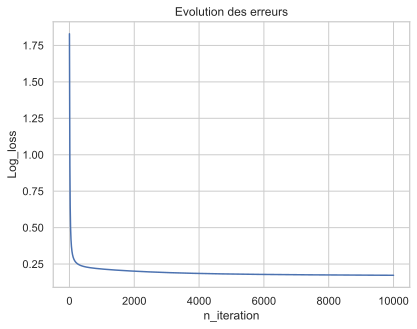

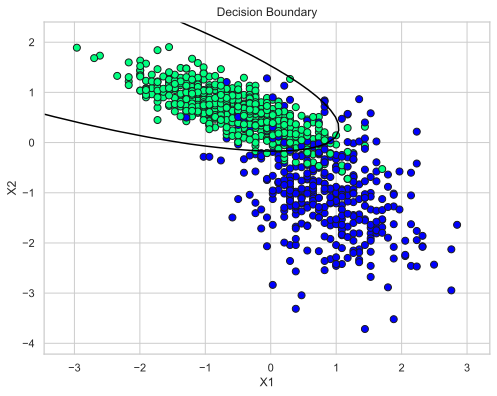

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(Poly_X_test[:, 0], Poly_X_test[:, 1], c=Y_test, cmap=plt.cm.winter, s=50, edgecolors='k')

# Create a mesh grid
u = np.linspace(Poly_X_test[:,0].min()-0.5,Poly_X_test[:,0].max()+0.5, 50)
v = np.linspace(Poly_X_test[:,1].min()-0.5, Poly_X_test[:,1].max()+0.5, 50)
U, V = np.meshgrid(u, v)

# Flatten U, V
U_flat = U.ravel()
V_flat = V.ravel()

# Transform with mapFeature and apply model
X_grid_poly = mapFeature(U_flat, V_flat, degree)
Z = X_grid_poly.dot(W) + b

# Reshape back to grid
Z = Z.reshape(U.shape)

# Plot the decision boundary
plt.grid(True)
plt.contour(U, V, Z, levels=[0], cmap="Greys_r")
plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()